# Projeto báscio de Machine Learning utilizando o algoritimo KNN

In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("[Copy] -  Bank_Personal_Loan_Modelling.xlsx - Data.csv")

In [33]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Através da análise das variáveis e do dicionário, algums informações relevantes:


##  - Variáveis categóricas:
    
    - Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo
    - Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?
    - CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?
    - Online - O cliente usa serviços de banco pela Internet?
    - Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

## -  Variáveis contínuas:

    - Age (Idade) Idade do cliente
    - Experience (Experiência) - anos de experiência
    - Income (Renda) - Renda anual em dólares
    - CCAvg (CCAvg) - gasto médio com cartão de crédito
    - Mortage (Hipoteca) - Valor da hipoteca da casa

## Variáveis ​​categóricas ordinais:
    
    - Family (Família) - tamanho da família do cliente
    - Education (Educação) - nível de educação do cliente


## Inferências Preliminares:
    - A variável ID não adiciona nenhuma informação interessante. Não há associação entre o ID de cliente de uma pessoa e o empréstimo, também não fornece nenhuma conclusão geral para futuros clientes de empréstimo em potencial. Assim sendo, essas informações serão extraídas do Dataframe.
    - Zip code também pode ser descosiderada, uma vez que a informação de distnância entre zip code pode não ser realidade

In [34]:
#Excluindo variáveis não úteis

df = df.drop(columns=["ID", "ZIP Code"])

In [35]:
# Estatística básica das variáveis

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [36]:
# Percentual da distruibuição da variável target

df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [37]:
# Pelo fato da base ser desbalanceada, não será usada toda a classe 0.
# Será pega uma amostra e agrupada com o registros da classe 1 para modelar de forma mais justa.

df_classe_1 = df[df["Personal Loan"] == 1]
df_classe_0 = df[df["Personal Loan"] == 0].sample(n=1500)
df = df_classe_1.append(df_classe_0)

In [38]:
import plotly.express as px

fig = px.scatter_3d(df, x= 'Age', y = 'CCAvg', z = 'Income', color='Personal Loan')
fig.show()

In [39]:
# Dividindo preditores (X) e variável target (Y)

X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [43]:
# Importando libs relevantes para a confecção do modelo

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Dividindo a base em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (1584, 11)
Shape y_train: (1584,)
Shape X_test: (396, 11)
Shape y_test: (396,)


In [44]:
# Normalização das variáveis

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [45]:
# Escolhendo a melhor quantidade de Neighbor

scores = []
K_neighbors = range(3,15)

for k in K_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Score')

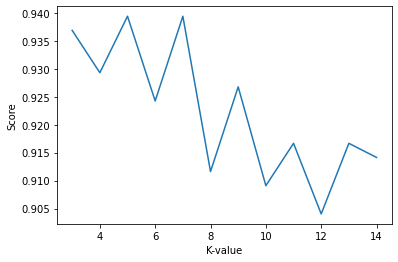

In [46]:
# Plotando a relação K_Neighbor por Score

import matplotlib.pyplot as plt

plt.plot(K_neighbors, scores)
plt.xlabel('K-value')
plt.ylabel('Score')

In [47]:
# Pelo resultado fica claro que as melhores escolhas são de 5 e 7 neighbors para o modelo com acurácia de quase 94%

# Construindo modelo com o resultado apurado acima:
K_neighbors = 5

clf = KNeighborsClassifier(n_neighbors = K_neighbors)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.9393939393939394